In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os.path as p

import xarray as xr

import cmocean

from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import addcyclic


## Pretty plots
plt.rcParams['figure.figsize'] = (12, 12) # set default figure size to 12x12 inches
plt.rc('text',usetex=True)
#font = {'family':'serif','size':16}
font = {'family':'serif','size':16, 'serif': ['computer modern roman']}
# font = {'size':16, 'serif': ['computer modern roman']}
plt.rc('font',**font)
plt.rc('legend',**{'fontsize':14})
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']


/anaconda3/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [34]:
woa2018_salinity = xr.open_dataset('/Volumes/Lagarostrobos/datasets/observations/'+
                                   'world_ocean_atlas/2018/woa18_decav_s00_04.nc', decode_times=False)

In [38]:
woa2018_salinity.lat[600:]

<xarray.DataArray 'lat' (lat: 120)>
array([60.125, 60.375, 60.625, 60.875, 61.125, 61.375, 61.625, 61.875, 62.125,
       62.375, 62.625, 62.875, 63.125, 63.375, 63.625, 63.875, 64.125, 64.375,
       64.625, 64.875, 65.125, 65.375, 65.625, 65.875, 66.125, 66.375, 66.625,
       66.875, 67.125, 67.375, 67.625, 67.875, 68.125, 68.375, 68.625, 68.875,
       69.125, 69.375, 69.625, 69.875, 70.125, 70.375, 70.625, 70.875, 71.125,
       71.375, 71.625, 71.875, 72.125, 72.375, 72.625, 72.875, 73.125, 73.375,
       73.625, 73.875, 74.125, 74.375, 74.625, 74.875, 75.125, 75.375, 75.625,
       75.875, 76.125, 76.375, 76.625, 76.875, 77.125, 77.375, 77.625, 77.875,
       78.125, 78.375, 78.625, 78.875, 79.125, 79.375, 79.625, 79.875, 80.125,
       80.375, 80.625, 80.875, 81.125, 81.375, 81.625, 81.875, 82.125, 82.375,
       82.625, 82.875, 83.125, 83.375, 83.625, 83.875, 84.125, 84.375, 84.625,
       84.875, 85.125, 85.375, 85.625, 85.875, 86.125, 86.375, 86.625, 86.875,
       87.125, 8

In [3]:
fwc = np.loadtxt('/Users/doddridge/Documents/Edward/Research/datasets/observations/beaufort_gyre/bgfwcoint17fw.dat')

In [4]:
column_labels = ['lat', 'lon']

years = np.arange(2003, 2018)

for year in years:
    column_labels.append(str(year))

In [5]:
fwc = pd.DataFrame(data = fwc, columns=column_labels)

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


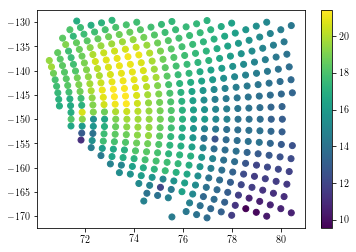

In [6]:
plt.scatter(fwc.lat, fwc.lon, c=fwc['2003'])
plt.colorbar()

In [7]:
from scipy.interpolate import griddata

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


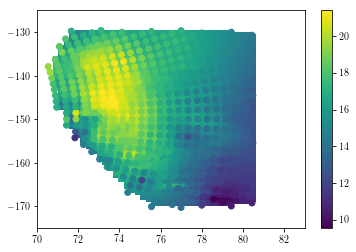

In [8]:

points = np.zeros((fwc.lon.shape[0], 2))
for i in range(fwc.lon.shape[0]):
    points[i,0] = fwc.lat[i]
    points[i,1] = fwc.lon[i]
    
lat = np.linspace(70, 83, 50)
lon = np.linspace(-175, -125, 100)

lat, lon = np.meshgrid(lat, lon)

fwc_gridded = np.empty((len(fwc.columns)-2, lat.shape[0], lat.shape[1]))

for t, year in enumerate(fwc.columns[2:]):
    fwc_gridded[t,:,:] = griddata(points, fwc[year].values, (lat, lon), method='cubic')
    
plt.pcolor(lat, lon, fwc_gridded[2,:,:])
# plt.contourf(lat,lon,zz) # if you want contour plot
plt.scatter(fwc.lat, fwc.lon, c=fwc['2003'])

#plt.imshow(zz)
plt.colorbar()


In [13]:
fwc_gridded.shape

(15, 100, 50)

In [14]:
dot = xr.open_dataset('/Users/doddridge/Documents/Edward/Research/datasets'+
                      '/observations/dynamic_ocean_topography/CPOM_DOT.nc')

In [15]:
dot

<xarray.Dataset>
Dimensions:  (date: 144, lat: 87, lon: 480)
Coordinates:
  * lon      (lon) float32 -179.25 -178.5 -177.75 -177.0 ... 178.5 179.25 180.0
  * lat      (lat) float32 60.0 60.25 60.5 60.75 61.0 ... 80.75 81.0 81.25 81.5
  * date     (date) int32 200301 200302 200303 200304 ... 201410 201411 201412
Data variables:
    DOT      (lat, lon, date) float32 ...
    U        (lat, lon, date) float32 ...
    V        (lat, lon, date) float32 ...

In [16]:
dot_cyclic = xr.concat([dot, dot.sel(lon=-179.25)], 'lon')

In [17]:
dot_lon, dot_lat = np.meshgrid(dot_cyclic.lon, dot_cyclic.lat)





In [18]:
# m_NPS = Basemap(projection='npstere',boundinglat=70,lon_0=180,resolution='l')
# m_NPS = Basemap(projection='stere',resolution='l', llcrnrlon=-175, llcrnrlat=65, urcrnrlon=-100, urcrnrlat=80,
#                 lat_0=76,lon_0=-150.)
m_NPS = Basemap(projection='laea',resolution='i',
                #llcrnrlon=-175, llcrnrlat=65, urcrnrlon=-100, urcrnrlat=80,
                width=2.5e6, height=2.5e6,
                lat_0=76,lon_0=-142.)

x_fwc,y_fwc = m_NPS(lon, lat)
fwc_lon, fwc_lat = m_NPS(fwc.lon.values, fwc.lat.values)
x_dot, y_dot = m_NPS(dot_lon, dot_lat)

In [19]:
import pylab as p

import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib as mpl

In [20]:
def curly_arrow(start, end, arr_size = 1, n = 5, col='gray', linew=1., width = 0.1):
    xmin, ymin = start
    xmax, ymax = end
    dist = np.sqrt((xmin - xmax)**2 + (ymin - ymax)**2)
    n0 = dist / (2 * np.pi)

    x = np.linspace(0, dist, 151) + xmin
    y = width * np.sin(n * x / n0) + ymin
    line = plt.Line2D(x,y, color=col, lw=linew)

    del_x = xmax - xmin
    del_y = ymax - ymin
    ang = np.arctan2(del_y, del_x)

    line.set_transform(mpl.transforms.Affine2D().rotate_around(xmin, ymin, ang) + ax.transData)
    ax.add_line(line)

    verts = np.array([[0,1],[0,-1],[2,0],[0,1]]).astype(float) * arr_size
    verts[:,1] += ymax
    verts[:,0] += xmax
    path = mpath.Path(verts)
    patch = mpatches.PathPatch(path, fc=col, ec=col)

    patch.set_transform(mpl.transforms.Affine2D().rotate_around(xmax, ymax, ang) + ax.transData)
    return patch

In [27]:
foo = np.arange(2003,2017)
print(foo)
print(foo[:11])

[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]


/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


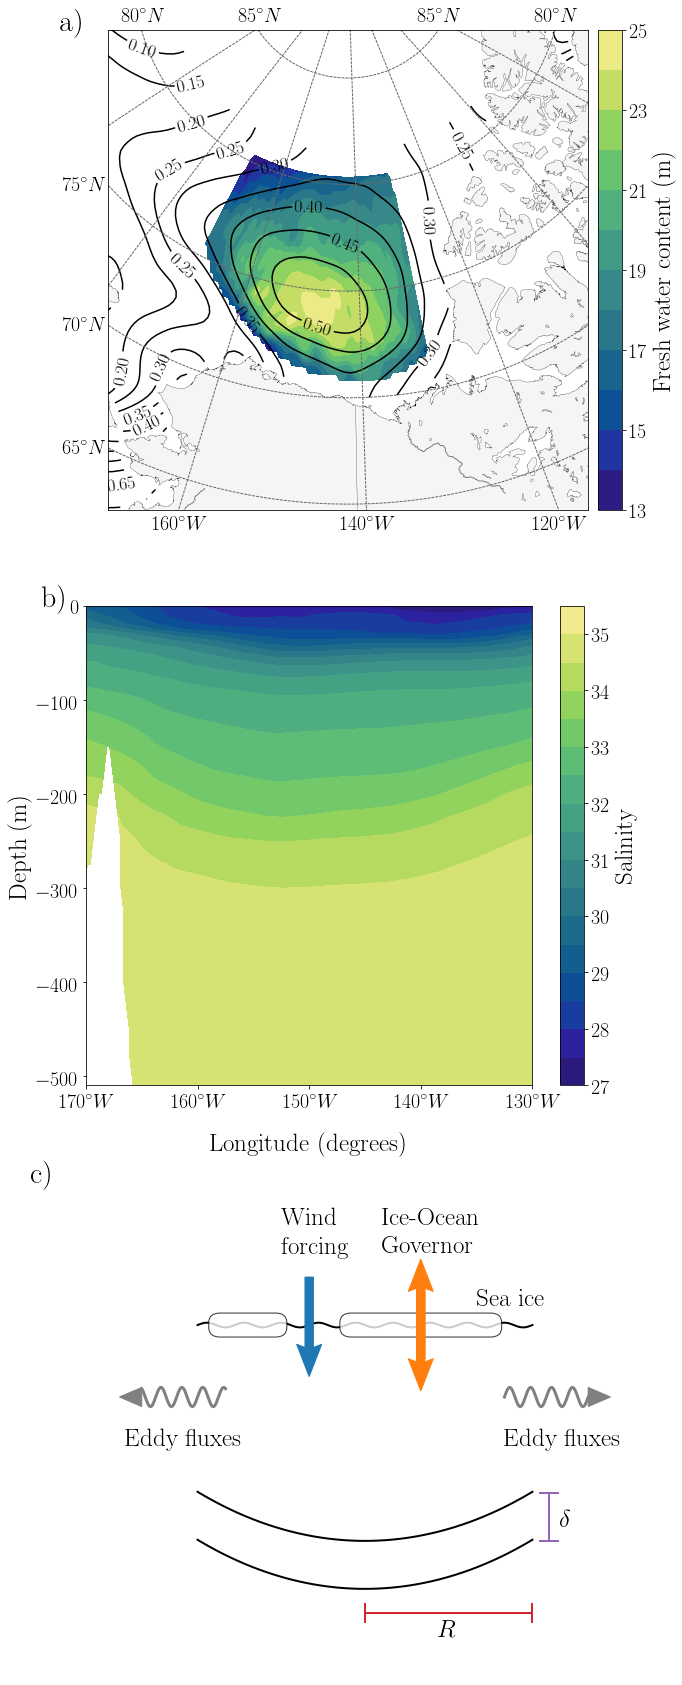

In [70]:
fig = plt.figure(figsize=(10,30))

ax = fig.add_subplot(311)

# draw coastlines, country boundaries, fill continents.
m_NPS.drawcoastlines(linewidth=0.25)
m_NPS.drawcountries(linewidth=0.25)
m_NPS.fillcontinents(color='whitesmoke',lake_color='white')

m_NPS.drawmeridians(np.arange(0,360,20),'dimgrey',dashes=[3,1], latmax=90,
                      labels=[False,False,False,True],
                      linewidth=1,fontsize=20)
m_NPS.drawparallels(np.arange(-90,90,5),'dimgrey',dashes=[3,1],
                      labels=[True,False,True,False],
                      linewidth=1, fontsize=20);

im = m_NPS.contourf(x_fwc,y_fwc, fwc_gridded[:11].mean(axis=0),
                    np.arange(13,26,1),
#                      vmin=14, vmax=25,
                    cmap=cmocean.cm.haline)
#                           ,cmap='BrBG')
# im.set_edgecolor('face')
CB = m_NPS.colorbar(im)
CB.ax.tick_params(labelsize=20)
# CB.set_ticks(np.arange(-1,1.1,0.2))
CB.set_label('Fresh water content (m)',fontsize=25)

CS = m_NPS.contour(x_dot, y_dot, dot_cyclic.DOT.mean(dim=['date']), np.arange(0.1, 1, 0.05), colors='k')
plt.clabel(CS, inline=1, fontsize=18, fmt='%1.2f')


ax.text(-0.1,1, 'a)', fontsize=30, transform=ax.transAxes)

#############
ax = fig.add_subplot(312)


im = ax.contourf(woa2018_salinity.lon[:], -woa2018_salinity.depth[:], woa2018_salinity.s_an.sel(lat=75.125, time=4326),
                         np.arange(27, 36, 0.5), cmap=cmocean.cm.haline)
CB = plt.colorbar(im)

CB.ax.tick_params(labelsize=20)
CB.set_label('Salinity',fontsize=25)

plt.xlim(-170,-130)
locs, labels = plt.xticks()
xlocs= np.arange(-170, -120, 10)
xlabels = ['$170^{\circ}W$', '$160^{\circ}W$', '$150^{\circ}W$', '$140^{\circ}W$',
           '$130^{\circ}W$', '$120^{\circ}W$']
plt.xticks(xlocs, xlabels, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-510,0)

plt.ylabel('Depth (m)', fontsize=25)
plt.xlabel('Longitude (degrees)', fontsize=25, labelpad=20)


ax.text(-0.1,1, 'b)', fontsize=30, transform=ax.transAxes)

#######################################
ax = fig.add_subplot(313)
x = np.linspace(0.2,0.8,100)

plt.rc('text',usetex=True)

# with plt.xkcd():

# halocline
r_y = 2
r_x = 0.95
c_x = 0.5
c_y = 1.15
y = c_y -np.sqrt(r_y**2 - ((x-c_x)**2)*r_y**2/r_x**2)
ax.plot(x,y, 'k', linewidth=2)

c_y = 1.25
y = c_y -np.sqrt(r_y**2 - ((x-c_x)**2)*r_y**2/r_x**2)
ax.plot(x,y,  'k', linewidth=2)

# surface of ocean
ax.plot(x, -0.3 + 0.005*np.sin(np.pi*30*x), 'k', linewidth=2)

# blocks of ice
ice_1 = mpatches.FancyBboxPatch((0.24,-0.305),0.1,0.01,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                  facecolor='w', edgecolor='k', zorder=4, alpha=0.8)
ax.add_patch(ice_1)

ice_2 = mpatches.FancyBboxPatch((0.475,-0.305),0.25,0.01,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                  facecolor='w', edgecolor='k', zorder=4, alpha=0.8)
ax.add_patch(ice_2)

# ice_3 = mpatches.FancyBboxPatch((0.66,-0.305),0.1,0.01,
#     boxstyle=mpatches.BoxStyle("Round", pad=0.02),
#                                   facecolor='w', edgecolor='k', zorder=10, alpha=0.8)
# ax.add_patch(ice_3)
ax.text(0.7, -0.26, 'Sea ice', fontsize=25)


# wind
p.arrow(0.4, -0.2, 0, -0.14, width=0.015, length_includes_head=False, overhang=0.1, edgecolor='C0', zorder=4)
ax.text(0.35, -0.15, 'Wind \n forcing', fontsize=25)

# Governor
p.arrow(0.6, -0.23, 0, -0.14, width=0.015, length_includes_head=False, overhang=0.1,
        facecolor='C1', edgecolor='C1', zorder=4)
p.arrow(0.6, -0.37, 0, 0.14, width=0.015, length_includes_head=False, overhang=0.1,
        facecolor='C1',  edgecolor='C1', zorder=4)
ax.text(0.53, -0.15, 'Ice-Ocean \n Governor', fontsize=25)

# eedy fluxes
ax.add_patch(curly_arrow((0.25, -0.45), (0.1, -0.45), n=4, arr_size=0.02, linew=3, width=0.02))
ax.add_patch(curly_arrow((0.75, -0.45), (0.9, -0.45), n=4, arr_size=0.02, linew=3, width=0.02))
ax.text(0.07, -0.55, 'Eddy fluxes', fontsize=25)
ax.text(0.75, -0.55, 'Eddy fluxes', fontsize=25)

# radius measurment
plt.errorbar(0.65, -0.9, xerr=0.15, capsize=10, linewidth=2, capthick=2, color='C3')
ax.text(0.63,-0.95, '$R$', fontsize=25)

# halocline thickness
plt.errorbar(0.83, -0.7, yerr=0.05, capsize=10, linewidth=2, capthick=2, color='C4')
ax.text(0.85,-0.72, '$\delta$', fontsize=25)

ax.text(-0.1,1, 'c)', fontsize=30, transform=ax.transAxes)

ax.set_ylim(-1,0)
ax.set_xlim(0,1)
ax.axis('off')


fig.savefig('/Users/doddridge/Desktop/BG_observational_fwc2003-2013.pdf', bbox_inches='tight')

Text(0.5,0,'Longitude (degrees)')

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


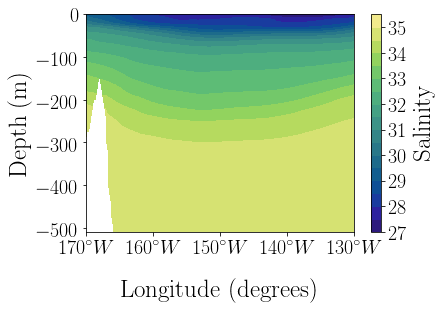

In [68]:
plt.contourf(woa2018_salinity.lon[:], -woa2018_salinity.depth[:], woa2018_salinity.s_an.sel(lat=75.125, time=4326),
                         np.arange(27, 36, 0.5), cmap=cmocean.cm.haline)
CB = plt.colorbar()

CB.ax.tick_params(labelsize=20)
CB.set_label('Salinity',fontsize=25)

plt.xlim(-170,-130)
locs, labels = plt.xticks()
xlocs= np.arange(-170, -120, 10)
xlabels = ['$170^{\circ}W$', '$160^{\circ}W$', '$150^{\circ}W$', '$140^{\circ}W$',
           '$130^{\circ}W$', '$120^{\circ}W$']
plt.xticks(xlocs, xlabels, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-510,0)

plt.ylabel('Depth (m)', fontsize=25)
plt.xlabel('Longitude (degrees)', fontsize=25, labelpad=20)

<xarray.DataArray 's_an' (depth: 102, lon: 1440)>
[146880 values with dtype=float32]
Coordinates:
    lat      float32 75.125
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
    time     float32 4326.0
Attributes:
    standard_name:  salinity
    long_name:      Objectively analyzed mean fields for salinity at standard...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          1

In [48]:
woa2018_salinity.s_an.sel(lat=75.125, time=4326)

<xarray.DataArray 's_an' (depth: 102, lon: 1440)>
[146880 values with dtype=float32]
Coordinates:
    lat      float32 75.125
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
    time     float32 4326.0
Attributes:
    standard_name:  salinity
    long_name:      Objectively analyzed mean fields for salinity at standard...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          1